<a href="https://colab.research.google.com/github/beratyasads/phyton_functions/blob/phyton/PHYTON_Code_Look_Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def sencron_colab():
  from google.colab import drive
  drive.mount('/content/gdrive')

In [ ]:
sencron_colab()

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd

## MAP

sadece series'lerle çalışır. bir fonksiyon ile o serinin değerini convert eder. df üzerinde çalışırken tek kolon (series) haline getirmek gerekir. 

In [ ]:
df["C"]=df["A"].map(lambda x:x+2)

In [ ]:
df

,A,B,C
0,1,2,3
1,6,7,8
2,4,2,6


In [ ]:
def sqr_value(x):
    return x*x

In [ ]:
df["D"]=df["A"].map(sqr_value)

In [ ]:
df

,A,B,C,D
0,1,2,3,1
1,6,7,8,36
2,4,2,6,16


In [ ]:
# map map functionın bunların yanında çok daha kullanışlı bir formu daha var. fonsiyonel programlama yapmamızı sağlar. 
#map function'ın ilk argumenti yapılacak işlemi, daha sonrakiler ise iterable olacak serileri ifade eder. aşağıdaki 
#örnekte 20 farklı list eklenebilirdi. 

store1 = [10.00, 11.00, 12.34, 2.34]
store2 = [9.00, 11.10, 12.34, 2.01]
cheapest = map(min, store1, store2)

# veya aşağıdaki şekilde de kullanılabilir. bu örnekte lambda fonsuyonunu itarqatif bir şekilde uygulamış oldu

list_2=[1,2,3,4]
print(list(map(lambda x:x*2,list_2)))

[2, 4, 6, 8]


In [ ]:
list(cheapest)

[9.0, 11.0, 12.34, 2.01]

In [ ]:
people = ['Dr. Christopher Brooks', 'Dr. Kevyn Collins-Thompson', 'Dr. VG Vinod Vydiswaran', 'Dr. Daniel Romero']

def split_title_and_name(person):
    title = person.split()[0]
    lastname = person.split()[-1]
    return '{} {}'.format(title, lastname)

list(map(split_title_and_name, people))

['Dr. Brooks', 'Dr. Collins-Thompson', 'Dr. Vydiswaran', 'Dr. Romero']

In [ ]:
#3 kolon içinde minimumu bulmak için de map kullanılabilir

df=pd.DataFrame([[1,2,5],[6,7,1],[4,2,4]], columns=["A","B","C"])

df["D"]=list(map(min,df["A"],df["B"],df["C"]))

df

,A,B,C,D
0,1,2,5,1
1,6,7,1,1
2,4,2,4,2


In [ ]:
import pandas as pd
def bigger(x,y):
  if x>=y:
    return x
  else:
    return y

In [ ]:
df=pd.DataFrame([[1,4,5],[4,2,9],[3,3,6]],columns=["value_1","value_2","value_3"])

In [ ]:
df["new_column"]=list(map(bigger,df["value_2"],df["value_3"]))

In [ ]:
df

,value_1,value_2,value_3,new_column
0,1,4,5,5
1,4,2,9,9
2,3,3,6,6


## APPLY

df üzerinde çalışır. birden fazla kolon ile conditional bir output üretilebilir. 

In [ ]:
def final_column(col):
    if col["A"]==1:
        return col["D"]-8
    else:
        return col["B"]*4
    

In [ ]:
df["E"]=df.apply(final_column,axis=1)

In [ ]:
df

,A,B,C,D,E
0,1,2,3,1,-7
1,6,7,8,36,28
2,4,2,6,16,8


In [ ]:
#tek bir kolon değil de tüm df için de çalışılabilir. datayı indirmediğim için commentledim

#def splitname(row):
    # The row is a single Series object which is a single row indexed by column values
    # Let's extract the firstname and create a new entry in the series
#    row['First']=row['President'].split(" ")[0]
    # Let's do the same with the last word in the string
#    row['Last']=row['President'].split(" ")[-1]
    # Now we just return the row and the pandas .apply() will take of merging them back into a DataFrame
#    return row

# Now if we apply this to the dataframe indicating we want to apply it across columns
#df=df.apply(splitname, axis='columns')
#df.head()

## APPLMAP

Tüm df elementleri için çalışır. hepsini aynı fonsiyona göre transform eder

In [ ]:
df.applymap(lambda x:x*2)

,A,B,C,D,E
0,2,4,6,2,-14
1,12,14,16,72,56
2,8,4,12,32,16


## DATA TYPES

In [ ]:
df["F"]=["ab","cd","ef"]

In [ ]:
df["G"]=[2.8,1.2,0.2]

In [ ]:
df

,A,B,C,D,E,F,G
0,1,2,3,1,-7,ab,2.8
1,6,7,8,36,28,cd,1.2
2,4,2,6,16,8,ef,0.2


In [ ]:
df.dtypes[df.dtypes=="int64"]

A    int64
B    int64
C    int64
D    int64
E    int64
dtype: object

In [ ]:
df.dtypes[df.dtypes==np.number]
#dtypes'da np.number yazıldığında sadece flaotlar geliyor 
#fakat select_dtypes'ta tüm numberlar geliyor. bu yüzden dtypes'ta kullanılmamalı

G    float64
dtype: object

In [ ]:
df.dtypes

A      int64
B      int64
C      int64
D      int64
E      int64
F     object
G    float64
dtype: object

In [ ]:
df.select_dtypes(include=[np.number])
#seelct_dtypes ile istenilen data tipindeki kolonlar getiriliyor. 
#sadece dtype kullanıldığında kolon data tipleri geliyor değerler gelmiyor

,A,B,C,D,E,G
0,1,2,3,1,-7,2.8
1,6,7,8,36,28,1.2
2,4,2,6,16,8,0.2


In [ ]:
df.select_dtypes(include=["int64"])

,A,B,C,D,E
0,1,2,3,1,-7
1,6,7,8,36,28
2,4,2,6,16,8


## To Numeric

error ignore ile eğer kolonda tüm değerler numeric'e çevrilemiyorsa o kolona müdahale etmiyor ve o kolonda numeric'e çevrilebilecek str değerler de str kalıyor. eğer tüm değerler numerice çevrilebiliyorsa o kolonu numerice çeviriyor. eğer tüm değerler int'ye çeviriliyorsa kolon dtype'ı intye çevrilemiyorsa float varsa kolon dtype'ı float'a çeviriliyor. bu durumda 2 yerine 2.0 değeri float olarak yer alır

In [ ]:
df["H"]=["1","1.3","tz"]
df

,A,B,C,D,E,F,G,H
0,1,2,3,1,-7,ab,2.8,1
1,6,7,8,36,28,cd,1.2,1.3
2,4,2,6,16,8,ef,0.2,tz


In [ ]:
df=df.apply(pd.to_numeric, errors='ignore')
df

,A,B,C,D,E,F,G,H
0,1,2,3,1,-7,ab,2.8,1
1,6,7,8,36,28,cd,1.2,1.3
2,4,2,6,16,8,ef,0.2,tz


In [ ]:
df.dtypes

A      int64
B      int64
C      int64
D      int64
E      int64
F     object
G    float64
H     object
dtype: object

In [ ]:
type(df.loc[1,"H"])

str

In [ ]:
df["K"]=["1.2","0.4","2.1"]
df.dtypes

A      int64
B      int64
C      int64
D      int64
E      int64
F     object
G    float64
H     object
K     object
dtype: object

In [ ]:
df=df.apply(pd.to_numeric, errors='ignore')
df.dtypes

A      int64
B      int64
C      int64
D      int64
E      int64
F     object
G    float64
H     object
K    float64
dtype: object

In [ ]:
type(df.loc[1,"K"])

numpy.float64

In [ ]:
df["L"]=["1.2","2.3","3.4"]
df["M"]=["3.4","2","2.3"]
df["N"]=["1","2","4"]

In [ ]:
df=df.apply(pd.to_numeric, errors='ignore')
df.dtypes

A      int64
B      int64
C      int64
D      int64
E      int64
F     object
G    float64
H     object
K    float64
L    float64
M    float64
N      int64
dtype: object

#

# LIST

In [ ]:
x=["a","b","c"]

In [ ]:
d,e,f=x

In [ ]:
d

'a'

# PRINT

In [ ]:
sales_record = {
'price': 3.24,
'num_items': 4,
'person': 'Chris'}

sales_statement = '{} bought {} item(s) at a price of {} each for a total of {}'

print(sales_statement.format(sales_record['person'],
                             sales_record['num_items'],
                             sales_record['price'],
                             sales_record['num_items']*sales_record['price']))

Chris bought 4 item(s) at a price of 3.24 each for a total of 12.96


# DATA TIME

In [ ]:
import datetime as dt
import time as tm

`time` returns the current time in seconds since the Epoch. (January 1st, 1970)

In [ ]:
tm.time()

1604063013.1782887

Convert the timestamp to datetime.

In [ ]:
dtnow = dt.datetime.fromtimestamp(tm.time())
dtnow

datetime.datetime(2020, 10, 30, 13, 4, 37, 907094)

Handy datetime attributes:

In [ ]:
dtnow.year, dtnow.month, dtnow.day, dtnow.hour, dtnow.minute, dtnow.second # get year, month, day, etc.from a datetime

(2020, 10, 30, 13, 4, 37)

`timedelta` is a duration expressing the difference between two dates.

In [ ]:
delta = dt.timedelta(days = 100) # create a timedelta of 100 days
delta

datetime.timedelta(100)

In [ ]:
today = dt.date.today()

In [ ]:
today - delta # the date 100 days ago

datetime.date(2020, 7, 22)

# LAMBDA

lambda fonksiyonu aşağıdaki gibi de yazılabilir. bir çok yer de lampda fonksiyonu def'ten çok daha kullanışlıdır. map'in içinde de kullanılabilir. 

In [ ]:
(lambda a, b, c : a + b)(8,12,16)

20

In [ ]:
people = ['Dr. Christopher Brooks', 'Dr. Kevyn Collins-Thompson', 'Dr. VG Vinod Vydiswaran', 'Dr. Daniel Romero']

def split_title_and_name(person):
    return person.split()[0] + ' ' + person.split()[-1]

#option 1
for person in people:
    print(split_title_and_name(person) == (lambda x: x.split()[0] + ' ' + x.split()[-1])(person))

#option 2
list(map(split_title_and_name, people)) == list(map(lambda person: person.split()[0] + ' ' + person.split()[-1], people))

True
True
True
True


True

lambda ve mapin ortak kullanıldığı örnek 

In [ ]:
list_deneme=[1,2,5,6,7]
#yeni bir list ile tüm değerlerin 4 katının 5 gazlasını yazalım

In [ ]:
#lambda kullanılarak

list(map(lambda x:x*4+5,list_deneme))

[9, 13, 25, 29, 33]

In [ ]:
#def tanımlanarak
def exercise_1(x):
  return 4*x+5

list(map(exercise_1,list_deneme))

[9, 13, 25, 29, 33]

In [ ]:
#list comp ile oluşturma
[4*x+5 for x in list_deneme]

[9, 13, 25, 29, 33]

In [ ]:
#lampda ile yeni bir kolon tanımlarken 

import pandas as pd
df=pd.DataFrame([[1,2],[6,7],[4,2]], columns=["A","B"])

df["C"]=df["B"].map(lambda x:x*2)

df

,A,B,C
0,1,2,4
1,6,7,14
2,4,2,4


# ARRAY

phytonda numpy kütüphanesi ile işlenir. listlerden meydana gelmiş matrisler gibi düşünülebilir. her bir satır bir liste karşılık gelir. dataframe gibi kolonları yoktur. performansı çok yüksektir. array means list of lists

In [ ]:
import numpy as np
import math

In [ ]:
array_1=np.array([1,2,3,5])

In [ ]:
array_1

array([1, 2, 3, 5])

In [ ]:
array_2=np.array([[1,2,4,5],[2,3,8,12]])

In [ ]:
array_2

array([[ 1,  2,  4,  5],
       [ 2,  3,  8, 12]])

In [ ]:
print(array_2)

[[ 1  2  4  5]
 [ 2  3  8 12]]


In [ ]:
array_2.shape

(2, 4)

In [ ]:
array_2.ndim

2

In [ ]:
array_2.dtype

dtype('int64')

In [ ]:
array_3=np.array([[1,2,4,5.2],[2,3,8,12]])
print(array_3)
print()
print(array_3.dtype)

[[ 1.   2.   4.   5.2]
 [ 2.   3.   8.  12. ]]

float64


In [ ]:
array_4=np.array([[1,"b",4,5.2],[2,3,8,12]])
print(array_4)
print()
print(array_4.dtype.name)
#array yaratılırken en geniş data tipi seçilir. son örnekte char olduğu için tüm değerler chara döndü

[['1' 'b' '4' '5.2']
 ['2' '3' '8' '12']]

str672


In [ ]:
a=np.zeros((3,4))
b=np.ones((3,4))
print(a)
print()
print(b)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [ ]:
np.random.rand(2,3)

array([[0.1997274 , 0.43241364, 0.31193251],
       [0.10763035, 0.92310683, 0.6281075 ]])

In [ ]:
np.arange(10,50,2)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48])

In [ ]:
np.linspace(0,2,16) #float için böyle yapılmalı

array([0.        , 0.13333333, 0.26666667, 0.4       , 0.53333333,
       0.66666667, 0.8       , 0.93333333, 1.06666667, 1.2       ,
       1.33333333, 1.46666667, 1.6       , 1.73333333, 1.86666667,
       2.        ])

arraylerde aritmetik işlemler aynı matrixlerde olduğu gibi gerçekleşir.

In [ ]:
a=np.array([[1,2,4],[2,4,5]])
b=np.array([[3,0,2],[1,2,6]])
print(a)
print()
print(b)

[[1 2 4]
 [2 4 5]]

[[3 0 2]
 [1 2 6]]


In [ ]:
print(a+b)
print()
print(a-b)
print()
print(a*b) #birebir çarpım(elementvise product), vektörel çarpım sonra gelecek
print()
print(a*2-6)



[[ 4  2  6]
 [ 3  6 11]]

[[-2  2  2]
 [ 1  2 -1]]

[[ 3  0  8]
 [ 2  8 30]]

[[-4 -2  2]
 [-2  2  4]]


In [ ]:
(a*2-6)>0

array([[False, False,  True],
       [False,  True,  True]])

In [ ]:
(3*a)%2==0

array([[False,  True,  True],
       [ True,  True, False]])

In [ ]:
a=np.array([[1,2,4],[2,4,5]])
b=np.array([[3,0],[1,2],[2,0]])
print(a@b) #matrix product

[[13  4]
 [20  8]]


In [ ]:
print(a.min())
print(a.max())
print(a.mean())
print(a.std())
print(a.sum())

1
5
3.0
1.4142135623730951
18


In [ ]:
np.arange(1,16,1).reshape(3,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [ ]:
a=np.array([[1,2,4],[2,4,5]])
print(a)
print()
print(a.reshape(3,2))

[[1 2 4]
 [2 4 5]]

[[1 2]
 [4 2]
 [4 5]]


In [ ]:
a

array([[1, 2, 4],
       [2, 4, 5]])

In [ ]:
print(a[0,1])
print()
print(a[[0,1],[1,1]]) # burda a arrayinden 0,1 ve 1,1 noktalarını alıyor ,lk list x ikinci y
print()
print(a[:,0:1])
print()
print(a[:,2]) #bu şekilde yazınca shape değişiyor ve yatay oluyor. shape korunsun isteniyorsa bir aşağıdaki gibi yazılmalı
              #yani yatay veya dikey indexleme için tek bir index numrası vermemek gerekir
print()
print(a[:,2:3])
print()
print(a[0,:])
print()
print(a[0:3,1:2])
print()
print(a[:,[0,2]])
print()
print(a[:,[0,2]].mean())



50

[50  4]

[[1]
 [2]]

[4 5]

[[4]
 [5]]

[ 1 50  4]

[[50]
 [ 4]]

[[1 4]
 [2 5]]

3.0


In [ ]:
print(a)
print()
print(a>1)
print()
print(a[a>1]) #bütün trueları yanyana yazıp getiriyor

[[1 2 4]
 [2 4 5]]

[[False  True  True]
 [ True  True  True]]

[2 4 2 4 5]


In [ ]:
print(a)
print()
sub_a=a[0:2,1:3]
print(sub_a)
sub_a[0,0]=50
print()
print(a)
print()
print(sub_a) #bir arraydan başla bir array yaratılırse ikincide yapılan değişikklik 1.ye yansır



[[ 1 50  4]
 [ 2  4  5]]

[[50  4]
 [ 4  5]]

[[ 1 50  4]
 [ 2  4  5]]

[[50  4]
 [ 4  5]]


# WHERE

numpy kütüphanesi altında boolen mask ile çalışan bir fonsiyondur. ilk olarak condition yazılır (boolen mask olmalı yani true ve falselardan oluşan array, sonra boolan maskte true olanların ne ile doldurulacağı ve en sonda da false olanları ne ile doldurulacağı. 

In [ ]:
a=np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.where(a<5,a,a*10)

array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

In [ ]:
#multi dimensional array için de uygulanabilir. burda true olanlar için ilk arrayden 
#false olanlar için 2. arrayden değer alıyor

np.where([[True,False],[False,True]],[[8,7],[3,1]],[[9,4],[11,12]])


array([[ 8,  4],
       [11,  1]])

## READ CSV TO ARRAY

In [ ]:
data_path='gdrive/My Drive/ds/data/trial'

In [ ]:
#BERAT: csv dosyasından basitçe aşağıdaki gibi okunabilir. skip header ilk başlık satırını atlamak için 
#        kullanılır. bunları gelip bir arrayin içine yazar, bir sonraki örnekte de görüleceği üzere names de
#        her bir kolon için tanımlanabilir. bu durumda arrayin shape ve type bilgisi değişir. 
# son olarak bazı csv formatınların tüm satır değerleri delimetla ayrılarak tek bir hücreye yazılmıştır (excelde)
#bu durumda da isim verilmese bile kolonlara default isimler atanır ve yine tupple görüntüsü oluşur
# To load a dataset in Numpy, we can use the genfromtxt() function. We can specify data file name, delimiter
# (which is optional but often used), and number of rows to skip if we have a header row, hence it is 1 here

# The genfromtxt() function has a parameter called dtype for specifying data types of each column this
# parameter is optional. Without specifying the types, all types will be casted the same to the more
# general/precise type

wines = np.genfromtxt(data_path+"/winequality.csv", delimiter=";", skip_header=1)
wines

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [ ]:
wines.shape

(1599, 12)

In [ ]:
#bu şekilde name tanımlandığında aslında kolonu yok ediyor ve tüm bir satırı tek bir tupple a yazıyor. böylece satır sayısı 
#kadart tupple'ı alt alta yazmış oluyor. 
wines_name = np.genfromtxt(data_path+"/winequality.csv", delimiter=";", skip_header=1,names=("ebeer","asdasd asdla","aksdlasşd","skldkd","hsdkdl","kslfp","kdoeo","södl","klsw","sdkeo","skeoe","ıkeole"))
wines_name

array([(7.4, 0.7  , 0.  , 1.9, 0.076, 11., 34., 0.9978 , 3.51, 0.56,  9.4, 5.),
       (7.8, 0.88 , 0.  , 2.6, 0.098, 25., 67., 0.9968 , 3.2 , 0.68,  9.8, 5.),
       (7.8, 0.76 , 0.04, 2.3, 0.092, 15., 54., 0.997  , 3.26, 0.65,  9.8, 5.),
       ...,
       (6.3, 0.51 , 0.13, 2.3, 0.076, 29., 40., 0.99574, 3.42, 0.75, 11. , 6.),
       (5.9, 0.645, 0.12, 2. , 0.075, 32., 44., 0.99547, 3.57, 0.71, 10.2, 5.),
       (6. , 0.31 , 0.47, 3.6, 0.067, 18., 42., 0.99549, 3.39, 0.66, 11. , 6.)],
      dtype=[('ebeer', '<f8'), ('asdasd_asdla', '<f8'), ('aksdlasşd', '<f8'), ('skldkd', '<f8'), ('hsdkdl', '<f8'), ('kslfp', '<f8'), ('kdoeo', '<f8'), ('södl', '<f8'), ('klsw', '<f8'), ('sdkeo', '<f8'), ('skeoe', '<f8'), ('ıkeole', '<f8')])

In [ ]:
wines_name.shape

(1599,)

In [ ]:
#satır aşağıdaki gibi çağrılır. artık kolon olmadığı için wine_name[0,2] gibi bir ifade haat alır
wines_name[1]

(7.8, 0.88, 0., 2.6, 0.098, 25., 67., 0.9968, 3.2, 0.68, 9.8, 5.)

In [ ]:
#kolon ise ancak aşağıdaki gibi çağrılabilir. 
wines_name["ebeer"]

array([7.4, 7.8, 7.8, ..., 6.3, 5.9, 6. ])

# IMAGE

In [ ]:
from PIL import Image
from IPython.display import display

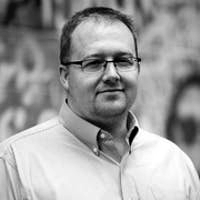

In [ ]:
image_path='gdrive/My Drive/ds/data/image'
# And let's just look at the image I'm talking about
im = Image.open(image_path+'/cris.tiff')
display(im)

In [ ]:
# Now, we can conver this PIL image to a numpy array
array=np.array(im)
print(array.shape)
array

(200, 200)


array([[118, 117, 118, ..., 103, 107, 110],
       [113, 113, 113, ..., 100, 103, 106],
       [108, 108, 107, ...,  95,  98, 102],
       ...,
       [177, 181, 182, ..., 193, 198, 192],
       [178, 182, 183, ..., 193, 201, 189],
       [178, 182, 184, ..., 193, 201, 187]], dtype=uint8)

In [ ]:
mask=np.full(array.shape,255)#bir kaç deneme yapmak için tüm değerleri 256 olan array yaratıldı
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [ ]:
modified_array=mask-array

In [ ]:
modified_array=modified_array.astype(np.uint8) #bu adımı her bir değer bir renk koduna karşılık gelsin diye yapıyoruz--> 256.bizim data tipimiz de buna uygun. tüm değerler 0-255 arasında

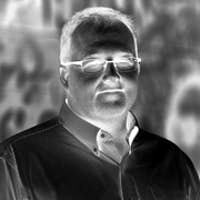

In [ ]:
display(Image.fromarray(modified_array))

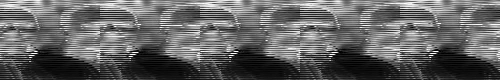

In [ ]:
display(Image.fromarray(modified_array.reshape(80,500)))

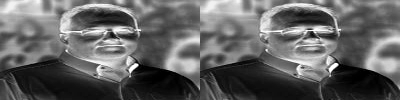

In [ ]:
display(Image.fromarray(modified_array.reshape(100,400)))

In [ ]:
# To load a dataset in Numpy, we can use the genfromtxt() function. We can specify data file name, delimiter
# (which is optional but often used), and number of rows to skip if we have a header row, hence it is 1 here

# The genfromtxt() function has a parameter called dtype for specifying data types of each column this
# parameter is optional. Without specifying the types, all types will be casted the same to the more
# general/precise type

wines = np.genfromtxt(data_path+"/winequality.csv", delimiter=";", skip_header=1,names=( "berasd","asjdas","skd asdşa","jasdkasd","sdasd","dsfre","kwwlw","ssçşsç.s","sddd ess vgggg","jskd","sklsdl","kdldl" ))
wines

array([(7.4, 0.7  , 0.  , 1.9, 0.076, 11., 34., 0.9978 , 3.51, 0.56,  9.4, 5.),
       (7.8, 0.88 , 0.  , 2.6, 0.098, 25., 67., 0.9968 , 3.2 , 0.68,  9.8, 5.),
       (7.8, 0.76 , 0.04, 2.3, 0.092, 15., 54., 0.997  , 3.26, 0.65,  9.8, 5.),
       ...,
       (6.3, 0.51 , 0.13, 2.3, 0.076, 29., 40., 0.99574, 3.42, 0.75, 11. , 6.),
       (5.9, 0.645, 0.12, 2. , 0.075, 32., 44., 0.99547, 3.57, 0.71, 10.2, 5.),
       (6. , 0.31 , 0.47, 3.6, 0.067, 18., 42., 0.99549, 3.39, 0.66, 11. , 6.)],
      dtype=[('berasd', '<f8'), ('asjdas', '<f8'), ('skd_asdşa', '<f8'), ('jasdkasd', '<f8'), ('sdasd', '<f8'), ('dsfre', '<f8'), ('kwwlw', '<f8'), ('ssçşsçs', '<f8'), ('sddd_ess_vgggg', '<f8'), ('jskd', '<f8'), ('sklsdl', '<f8'), ('kdldl', '<f8')])

In [ ]:
wines.shape

(1599,)

# REG EXP

In [ ]:
import re

In [ ]:
text="My name is Berat Yasa"

## MATCH
stringin başından karşılaştırmaya başlar aynı ise match olur. eğer match olursa bir fonksiyon döner olmazsa hiçbir şey dönmez if else ile kontrol edilebilir

In [ ]:
if re.match("My nam", text):
  print("yes")
else:
  print("no")

yes


In [ ]:
if re.match("my nam", text):
  print("yes")
else:
  print("no")

no


In [ ]:
re.match("adsa", text)

In [ ]:
re.match("My nam", text)

<_sre.SRE_Match object; span=(0, 6), match='My nam'>

## SEARCH
textin içinde aynı ifade geçip geçmediğini search eder. diğer kurallar match ile aynı

In [ ]:
text="My name is Berat Yasa. Berat is mine name"

In [ ]:
re.search("Berat",text) #ilk Berat'ı bulup getiriyor diğerini aramaya devam etmiyor

<_sre.SRE_Match object; span=(11, 16), match='Berat'>

## SPLIT

In [ ]:
re.split(" ",text)

['My', 'name', 'is', 'Berat', 'Yasa.', 'Berat', 'is', 'mine', 'name']

In [ ]:
re.split("My",text)

['', ' name is Berat Yasa. Berat is mine name']

In [ ]:
re.split("Berat",text)

['My name is ', ' Yasa. ', ' is mine name']

## FIND ALL

In [ ]:
text="Amy works diligently. Amy gets good grades. Our student Amy is succesful."

In [ ]:
re.findall("Amy",text) # text içindeki bütüm Amyleri bulur

['Amy', 'Amy', 'Amy']

In [ ]:
#^ işareti caret olarak geçiyor. bir tip anchor. ^'nın anlamı textteki her bir satırın başında
#ilgili ifadeyi arıyor. bizim metin tek bir satır olduğu için text'in en başına bakıyor. 
re.findall("^Amy",text)


['Amy']

In [ ]:
re.findall("works",text)

['works']

In [ ]:
re.findall("^works",text)

[]

### SET OPERATORS

[] ifadesi set operator olarak geçiyor. burada en çok dikkat edilmesi gereken special karakterler set operator içinde anlamlarını kaybediyor. ^ ifadesi satır başlarındaki eşleşmeyi ararken set operator içinde değil anlamına geliyor. 

temel olarak set operator karakterbazında bir search anamına gelir. set operator içindeki herbir karakter ayrı ayrı aranır. aşağıda örnekler mevcut. 

In [ ]:
grades="ACAAAABCBCBAAD"

In [ ]:
re.findall("B",grades)

['B', 'B', 'B']

In [ ]:
re.findall("[B]",grades)

['B', 'B', 'B']

In [ ]:
re.findall("[AB]",grades)

['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'A']

In [ ]:
re.findall("[A][B-D]",grades) #burda A ile başlayıp B'den D'ye (B,C,D) olanları getirir

['AC', 'AB', 'AD']

In [ ]:
#Bu ve önceki örnek birbirinin aynı sonuçlarını verir. 
re.findall("AC|AB|AD",grades)

['AC', 'AB', 'AD']

In [ ]:
# set operator başlığında bahsedildiği gibi ^ değil anlamına gelir. A olmayan herşeyi getirir
re.findall("[^A]",grades) 


['C', 'B', 'C', 'B', 'C', 'B', 'D']

In [ ]:
#set operator karakter based olduğu için ^ ifadesi A veya B olmayanları getirir
re.findall("[^AB]",grades) 

['C', 'C', 'C', 'D']

In [ ]:
#Aşağıdaki ifade boş küme getirir. çünkü ilk olarak set operator içindeki A olmayanlar getirir.
#daha sonra set operator dışındaki ^ başlangıç noktasını belirtil(anchor)
#string A ile başladığı için boş küme döner 
re.findall("^[^A]",grades)

[]

In [ ]:
#Yine aynı mantıkla önce B olmayanları getitrir. string A ile başladığı için bunu karşılar ve A gelir.
re.findall("^[^B]",grades)

['A']

özet olarak find ve match doğrudan ilk bulduğu eşleşmenin konumunu verir. fakat findall buldukarını bir liste yazar

### QUANTIFIERS

In [ ]:
grades="ACAACAAAABCBAACBACCCAAAAA"

In [ ]:
re.findall("A{3}",grades)

['AAA', 'AAA']

In [ ]:
#arka arkaya en az 2 en fazla 10 A geçenleri getirir. 
#stringin sonunda 5 tane A olmasına rağmen max 4 olduğu için 4a getirilmiş

re.findall("A{2,4}",grades)

['AA', 'AAAA', 'AA', 'AAAA']

In [ ]:

#burda ise tek A'dan sonra en az 1 ençok 3 C arıyor. başta 2 A sonra bir C varsa da bir  bir C getiriyor. 
#basitçe bu fonsiyonun amacı belli patternler string içinde var mı diye bakıyor. 
#Örneğin aşağıda AC,ACC,ACCC var mı diye bakıyor. 
#en az en çok aralığı verildiğinde her zaman varsa en çoka yakınsıyor. 
re.findall("A{1,1}C{1,3}",grades)

['AC', 'AC', 'AC', 'ACCC']

In [ ]:
re.findall("A{2}",grades)

['AA', 'AA', 'AA', 'AA', 'AA', 'AA']

In [ ]:
#Yukarıdaki ile beraber aynı sonucu verir. A{2} demek tam 2 tane geçenleri bul demek 
re.findall("AA",grades)

['AA', 'AA', 'AA', 'AA', 'AA', 'AA']

In [ ]:
string_1="AAAAA"

In [ ]:
#5 tane A olduğu için ancak 2 tane 2li bulabildi
re.findall("A{2}",string_1)

['AA', 'AA']

In [ ]:
  # bu şekilde 3lü de kullanılabilir
re.findall("A{1,10}B{1,10}C{1,10}",grades)

['AAAABC']

In [ ]:
grades="ACAACAAAABCBAACBACCCAAAAADABB"

In [ ]:
re.findall("AB{1,2}",grades)

['AB', 'ABB']

In [ ]:
re.findall("[AB]{1,4}",grades)

['A', 'AA', 'AAAA', 'B', 'BAA', 'BA', 'AAAA', 'A', 'ABB']

In [ ]:
re.findall("A|B{1,4}",grades)

['A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'A',
 'A',
 'B',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'BB']

In [ ]:
re.findall("A{1,4}|B{1,4}",grades)

['A', 'AA', 'AAAA', 'B', 'B', 'AA', 'B', 'A', 'AAAA', 'A', 'A', 'BB']

In [ ]:
#training
grades="ACAACAAAABCBAACBACCCAAAAADABBAAABBBBCC"

In [ ]:
#kaç tane AB var
re.findall("AB",grades)

['AB', 'AB', 'AB']

In [ ]:
#sırasıyla; en az 1 en fazla 3 A, en az 2 en fazla 4 B ve en az 1 enfazla 2 C olan patternler
re.findall("A{1,3}B{2,4}C{1,3}",grades)

['AAABBBBCC']

In [ ]:
#içinde A veya B geçen en az 3 en fazla 5 karakterli patternler
re.findall("[AB]{3,5}",grades)

['AAAAB', 'BAA', 'AAAAA', 'ABBAA', 'ABBBB']

In [ ]:
#A veya B olan patternlerin bulunması
re.findall("A|B",grades)

In [ ]:
#ya 2 karakterli AA paterni ya da 1 karakterli B patterninini bulunması
re.findall("A{2}|B{1}",grades)

['AA',
 'AA',
 'AA',
 'B',
 'B',
 'AA',
 'B',
 'AA',
 'AA',
 'B',
 'B',
 'AA',
 'B',
 'B',
 'B',
 'B']

In [ ]:
#bir tane A sonrasında en az 1 en çok 3 tane B
re.findall("AB{1,3}",grades)

['AB', 'ABB', 'ABBB']

In [ ]:
#en az 1 en fazla 4 karakter A'nın yanına en az bir en fazla 4 karakter B'nin geldiği patternler
import re
re.findall("A{1,4}B{1,4}",grades)

['AAAAB', 'ABB', 'AAABBBB']

### IMPORT TEXT
bir txt odyasını string olarak içeri almak için aşağıdaki kod çalıştırılmalı

In [ ]:
txt_path='gdrive/My Drive/ds/data/trial'

In [ ]:
with open(txt_path+"/ferpa.txt","r") as file:
  wiki=file.read()
wiki

'Overview[edit]\nFERPA gives parents access to their child\'s education records, an opportunity to seek to have the records amended, and some control over the disclosure of information from the records. With several exceptions, schools must have a student\'s consent prior to the disclosure of education records after that student is 18 years old. The law applies only to educational agencies and institutions that receive funds under a program administered by the U.S. Department of Education.\n\nOther regulations under this act, effective starting January 3, 2012, allow for greater disclosures of personal and directory student identifying information and regulate student IDs and e-mail addresses.[2] For example, schools may provide external companies with a student\'s personally identifiable information without the student\'s consent.[2]\n\nExamples of situations affected by FERPA include school employees divulging information to anyone other than the student about the student\'s grades o

In [ ]:
type(wiki)

str

In [ ]:
#regex için biraz daha detay vardı, fakat ilerleyen kurslarda detaylı anlatılacağı için burada bırakıldı

In [ ]:
#WEEK 1 BITTI

# PANDAS

## SERIES

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
students=["abc","def","rty"]

In [ ]:
pd.Series(students) #dtype object oldu

0    abc
1    def
2    rty
dtype: object

In [ ]:
numbers=[1,2,3]
pd.Series(numbers) #dtype int

0    1
1    2
2    3
dtype: int64

In [ ]:
mixed=["asd",12,12.2]
pd.Series(mixed)

0     asd
1      12
2    12.2
dtype: object

In [ ]:
float_num=[12.2,5.7,0.8]
pd.Series(float_num)

0    12.2
1     5.7
2     0.8
dtype: float64

### MISSING DATA
Phyton programlama'da iki adet null missing data tanımı mevcut. bunlardan ilki None diğeri ise np.nan (NaN). 

NaN-->not a number demek oluyor. EEE 754 floating point representation'da bir karşılığı var. ve float data tipindedir

None--> ise NoneType'tır ve object tipindedir. 

np.nan

her bir np.nan not a number demek olduğundan bir np.nan diğerine eşit değildir. fakat is ile kullanıldığında True dönüşü olur. 

In [ ]:
np.nan==np.nan

False

In [ ]:
np.nan is np.nan

True

In [ ]:
type(np.nan)

float

None
None ise NoneType bir objecttir. aslında veri yok gibi de düşünülebilir. None = None

In [ ]:
None==None

True

In [ ]:
None is None

True

In [ ]:
type(None)

NoneType

In [ ]:
#pandas hem None hem de np.nan'ı null olarak görür. örneği aşağıda

In [ ]:
list_1=["berat",None,np.nan]
s=pd.Series(list_1)
s

0    berat
1     None
2      NaN
dtype: object

In [ ]:
#dataframe başlığında detaylı anlatılıyor
record1 = pd.Series({'Name': 'Alice',
                        'Class': 'Physics',
                        'Score': 85})
record2 = pd.Series({'Name': 'Jack',
                        'Class': 'Chemistry',
                        'Score': 82})
record3 = pd.Series({'Name': 'Helen',
                        'Class': 'Biology',
                        'Score': 90})

df = pd.DataFrame([record1, record2, record3],
                  index=['school1', 'school2', 'school1'])


In [ ]:
df["np_null_column"]=np.nan

df

,Name,Class,Score,np_null_column
school1,Alice,Physics,85,NaN
school2,Jack,Chemistry,82,NaN
school1,Helen,Biology,90,NaN


In [ ]:
df["null_column"]=None 

df

,Name,Class,Score,np_null_column,null_column
school1,Alice,Physics,85,NaN,None
school2,Jack,Chemistry,82,NaN,None
school1,Helen,Biology,90,NaN,None


In [ ]:
df.isnull()

,Name,Class,Score,np_null_column,null_column
school1,False,False,False,True,True
school2,False,False,False,True,True
school1,False,False,False,True,True


In [ ]:
#isnull pandas kütüphanesi altında bulnan bir fonksiyondur
s.isnull()

0    False
1     True
2     True
dtype: bool

In [ ]:
#her ikisini birden null olarak gördü
s.fillna("xyz",inplace=True)
s

0    berat
1      xyz
2      xyz
dtype: object

In [ ]:
student_dict={"ahmet":"math",
              "ayse":"chem",
              "suleyman":"hist"}

In [ ]:
#dictionary üzerinden de seri yaratılabilir. bu durumda index dictionary'nin keyleri olur
s=pd.Series(student_dict)
s


ahmet       math
ayse        chem
suleyman    hist
dtype: object

In [ ]:
s.index

Index(['ahmet', 'ayse', 'suleyman'], dtype='object')

In [ ]:
#seriler için bu şekilde index atanabilir
s=pd.Series(["math","chem","hist"],index=["ahmet","ayse","suleyman"])
s

ahmet       math
ayse        chem
suleyman    hist
dtype: object

In [ ]:
#dict'ten series yaratmak çok fazla işe yarayabilir. aşağıdaki örnekte dict'te mehmet olmadığı için NaN değerini atadı.
student_dict={"ahmet":"math",
              "ayse":"chem",
              "suleyman":"hist"}
pd.Series(student_dict,index=["ahmet","ayse","mehmet"])

ahmet     math
ayse      chem
mehmet     NaN
dtype: object

In [ ]:
#NaN--> not a number

### Querying a Series
iloc index number ile çalışır. loc string ile 

In [ ]:
import numpy as np

In [ ]:
student_dict={"ahmet":"math",
              "ayse":"chem",
              "suleyman":"hist"}
s=pd.Series(student_dict)
s

ahmet       math
ayse        chem
suleyman    hist
dtype: object

In [ ]:
s.loc["ahmet"]

'math'

In [ ]:
s.iloc[2]

'hist'

In [ ]:
s[2]

'hist'

In [ ]:
s.loc["ahmet"]

'math'

In [ ]:
s["ahmet"]

'math'

In [ ]:
grades=pd.Series([10,20,60,40,80])
grades

0    10
1    20
2    60
3    40
4    80
dtype: int64

In [ ]:
#buradaki sum fonksiyonu numpy kütüphanesinden geliyor
grades.sum()

210

In [ ]:
#series için bu şekilde işlem yapılabilir.
grades=grades+2

In [ ]:
grades


0     6
1    29
2    69
3    49
4    89
dtype: int64

In [ ]:
grades+=5
grades

0    11
1    34
2    74
3    54
4    94
dtype: int64

In [ ]:
# iteritems ile aynı dictionary de olduğu gibi index ve value'u bir loopa sokabiliyoruz
for x,y in grades.iteritems():
  print(x)
  print(y)

0
11
1
34
2
74
3
54
4
94


In [ ]:
for x in grades:
  print(x)

11
34
74
54
94


In [ ]:
for x,y in grades.iteritems():
  if x==0:
    grades.iloc[x]=6
  else: 
    grades.iloc[x]=y+2
 


In [ ]:
grades

0     6
1    36
2    76
3    56
4    96
dtype: int64

In [ ]:
list_1=[1,2,3]
s=pd.Series(list_1)
s

0    1
1    2
2    3
dtype: int64

In [ ]:
s.loc["berat"]=8
s

0        1
1        2
2        3
berat    8
dtype: int64

In [ ]:
#bu şekilde yazınca yeni bir element eklemiyor. sadece değeri değiştiriyor.

s.iloc[3]=10
s

0         1
1         2
2         3
berat    10
dtype: int64

In [ ]:
kombine_s=s.append(s)

In [ ]:
kombine_s

0         1
1         2
2         3
berat    10
0         1
1         2
2         3
berat    10
dtype: int64

## DataFrame

önemli:csvden data okurken na_filter default olarak True değerini alır. bu da missinge benzeyen herşeyi (boşluk dahil) missing olarak atar. Bu kullanışlı özellik sayesinde missing value'ları detect etmek kolaulaşır. 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# from series to dataframe yaratılan serileriin indexleri kolon oluyor


In [ ]:
record1 = pd.Series({'Name': 'Alice',
                        'Class': 'Physics',
                        'Score': 85})
record2 = pd.Series({'Name': 'Jack',
                        'Class': 'Chemistry',
                        'Score': 82})
record3 = pd.Series({'Name': 'Helen',
                        'Class': 'Biology',
                        'Score': 90})

In [ ]:
# Like a Series, the DataFrame object is index. Here I'll use a group of series, where each series 
# represents a row of data. Just like the Series function, we can pass in our individual items
# in an array, and we can pass in our index values as a second arguments
df = pd.DataFrame([record1, record2, record3],
                  index=['school1', 'school2', 'school1'])

# And just like the Series we can use the head() function to see the first several rows of the
# dataframe, including indices from both axes, and we can use this to verify the columns and the rows
df.head()

,Name,Class,Score
school1,Alice,Physics,85
school2,Jack,Chemistry,82
school1,Helen,Biology,90


In [ ]:
#from dictionary to dataframe

In [ ]:
# An alternative method is that you could use a list of dictionaries, where each dictionary 
# represents a row of data.

students = [{'Name': 'Alice',
              'Class': 'Physics',
              'Score': 85},
            {'Name': 'Jack',
             'Class': 'Chemistry',
             'Score': 82},
            {'Name': 'Helen',
             'Class': 'Biology',
             'Score': 90}]

# Then we pass this list of dictionaries into the DataFrame function
df = pd.DataFrame(students, index=['school1', 'school2', 'school1'])
# And lets print the head again
df.head()

,Name,Class,Score
school1,Alice,Physics,85
school2,Jack,Chemistry,82
school1,Helen,Biology,90


In [ ]:
df.loc["school1","Name"]

school1    Alice
school1    Helen
Name: Name, dtype: object

In [ ]:
df.iloc[0,1:3]

Class    Physics
Score         85
Name: school1, dtype: object

In [ ]:
df.iloc[0,1]="Hist"
df

,Name,Class,Score
school1,Alice,Hist,85
school2,Jack,Chemistry,82
school1,Helen,Biology,90


In [ ]:
df.iloc[0:2,1:3]="Hist"
df

,Name,Class,Score
school1,Alice,Hist,Hist
school2,Jack,Hist,Hist
school1,Helen,Biology,90


In [ ]:
df.iloc[0:2,1:3]

,Class,Score
school1,Hist,Hist
school2,Hist,Hist


In [ ]:
print(df)
print()
print(df.T)

          Name    Class Score
school1  Alice     Hist  Hist
school2   Jack     Hist  Hist
school1  Helen  Biology    90

      school1 school2  school1
Name    Alice    Jack    Helen
Class    Hist    Hist  Biology
Score    Hist    Hist       90


In [ ]:
df.loc[:,["Name","Score"]]

,Name,Score
school1,Alice,Hist
school2,Jack,Hist
school1,Helen,90


### Drop

drop fonsiyonu ile series veya df'lerden kolon veya satır silinebilir. drop fonsiyonunda axis=0 default olarak gelir bu da satıra denk gelir. axis=1 olursa kolon anlamına gelir. drop fonksiyonun çalışması df veya seriden o datayı gerçekten silmez görüntü olarak silinmiş bir kopya görünür. gerçekten silinmesi isteniyorsa inplace=True denilmelidir. geri dönümşümsüz bir şekilde silme işlemi için ilgili kolon del fonksiyonu ile silinebilir 

In [ ]:
df

,Name,Class,Score
school1,Alice,Hist,Hist
school2,Jack,Hist,Hist
school1,Helen,Biology,90


In [ ]:
df.drop("school1")

,Name,Class,Score
school2,Jack,Hist,Hist


In [ ]:
# axis değeri değiştirilecerek row veya columndan drop yapılacağı belirlenir. 
df.drop("Name",axis=1)

,Class,Score
school1,Hist,Hist
school2,Hist,Hist
school1,Biology,90


In [ ]:
del df["Name"]

df

,Class,Score
school1,Hist,Hist
school2,Hist,Hist
school1,Biology,90


### Loading CSV to DataFrame

In [ ]:
data_path='gdrive/My Drive/ds/data/trial'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict.csv


In [ ]:
#cat fonksiyonununun çalışması için data path'te hiç boşluk olmaması lazım. google colab drive ile senkron olunca My Drive arasında boşluk var ve 
#değiştirilemiyor. bu sebeple doğrudan ilgili dosyayı colab'a import ettim (main dizine)
#cat ile csv file'i import etmeden genel görüntüsü anlaşılabilir
!cat Admission_Predict.csv

In [ ]:
df = pd.read_csv(data_path+'/Admission_Predict.csv')

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#pandas 0dan başlayacak şekilde indexliyor datayı. burada Serial No. sahasının index kolonu olması için;
#ikisi de aynı şey 
df = pd.read_csv(data_path+'/Admission_Predict.csv',index_col=[0])

#df = pd.read_csv(data_path+'/Admission_Predict.csv',index_col=["Serial No."])

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#yine orjinal df üzerinde değişiklik olmaz. inplace True olması lazım 
df.rename(columns={"GRE Score":"GRE_Score"}).head()

,GRE_Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#kolon adı tam olarak yazılmamışsa hata da vermez rename de yapmaz. aşağıdaki örnekte LOR'un sonunda boşluk var
df.rename(columns={"LOR":"LOR_1"}).head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.rename(columns={"LOR ":"LOR_1"}).head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR_1,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#strip fonsiyonu baştaki ve sondaki boşlukları alır
string="maksdfl sdfkdkfl    "
string.strip()

'maksdfl sdfkdkfl'

In [ ]:
df.columns=[x.strip() for x in df.columns]

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
df.columns=[x.lower().strip().replace(" ","_") for x in df.columns]
df.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


### Querying a DataFrame

burdaki filtrelemenin temelinde de boolen mask yer alıyor. 



In [ ]:
import pandas as pd
data_path='gdrive/My Drive/ds/data/trial'

In [ ]:
df = pd.read_csv(data_path+'/Admission_Predict.csv', index_col=0)

df.columns = [x.lower().strip() for x in df.columns]

df.head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
admit_mask=df['chance of admit'] > 0.7
admit_mask

Serial No.
1       True
2       True
3       True
4       True
5      False
       ...  
396     True
397     True
398     True
399    False
400     True
Name: chance of admit, Length: 400, dtype: bool

In [ ]:
#where fonksiyonunda şartları sağlamayan için tüm satırlar null gelir. burdaki where numpy where değil dataframe where.
#mantığı bir miktar farklı
df.where(admit_mask).head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
4,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#bu adımla null satırlar silinir. orjinal index numaraları korunur
df.where(admit_mask).dropna().head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
4,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
6,330.0,115.0,5.0,4.5,3.0,9.34,1.0,0.90


In [ ]:
#inplace true denmediği için df aslında değişmez 
df.head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


### AND OR

pandas dataframede filtreleme yaparken and ve or da kullanılabilir. fakat phyton and veya or'u kabul etmiyor. bunun yerine and-->& ve or-->| kullanılmalı. ayrıca her condition paranteze alınmalı


In [ ]:
df.head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df[(df["sop"]>=3) & (df["toefl score"]>=110)].head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
4,322,110,3,3.5,2.5,8.67,1,0.80
6,330,115,5,4.5,3.0,9.34,1,0.90
12,327,111,4,4.0,4.5,9.00,1,0.84
13,328,112,4,4.0,4.5,9.10,1,0.78


In [ ]:
df[(df["sop"]>=3) | (df["toefl score"]>=110)].head()

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
6,330,115,5,4.5,3.0,9.34,1,0.90


### Indexing DataFrame

In [ ]:
import pandas as pd
data_path='gdrive/My Drive/ds/data/trial'

In [ ]:
#serial no index oldu
df = pd.read_csv(data_path+"/Admission_Predict.csv", index_col=0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#index kolonunu değiştirmek istiyoruz ama index kolonundaki bilgiyi de saklamak istiyorsak ilk olarak
#index değerlerini yeni bir kolona yazıp yeni index olacak kolonu seçmemiz lazım

df['Serial Number'] = df.index

df = df.set_index('Chance of Admit ')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Serial Number
Chance of Admit,,,,,,,,
0.92,337,118,4,4.5,4.5,9.65,1,1
0.76,324,107,4,4.0,4.5,8.87,1,2
0.72,316,104,3,3.0,3.5,8.00,1,3
0.80,322,110,3,3.5,2.5,8.67,1,4
0.65,314,103,2,2.0,3.0,8.21,0,5


In [ ]:
#0'dan başlayıp index atanmasını istiyorsak reset_index fonksiyonu kullanılmalı 

#	Chance of Admit kolonu drop olmadı
df = df.reset_index()
df.head()

,Chance of Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Serial Number
0,0.92,337,118,4,4.5,4.5,9.65,1,1
1,0.76,324,107,4,4.0,4.5,8.87,1,2
2,0.72,316,104,3,3.0,3.5,8.00,1,3
3,0.80,322,110,3,3.5,2.5,8.67,1,4
4,0.65,314,103,2,2.0,3.0,8.21,0,5


#### Multi Index

In [ ]:
import pandas as pd
data_path='gdrive/My Drive/ds/data/trial'

In [ ]:
#serial no index oldu
df = pd.read_csv(data_path+"/census.csv")
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,INTERNATIONALMIG2010,...,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,4801108,4816089,4830533,4846411,4858979,5034,15947,14981,14444,15878,12568,14226,59689,59062,57938,58334,58305,11089,48811,48357,50843,50228,50330,3137,10878,10705,7095,8106,7975,1357,...,677,-573,1135,116185,116212,115560,115666,116963,119088,119599,12.453020,12.282581,12.012080,12.056286,12.014973,10.183524,10.056360,10.541099,10.380963,10.371556,2.269496,2.226220,1.470981,1.675322,1.643417,1.027720,1.019840,1.002216,1.142716,1.179963,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,55253,55175,55038,55290,55347,89,593,-78,-137,252,57,151,636,615,574,623,600,152,507,558,583,504,467,-1,129,57,-9,119,133,33,...,22,-10,45,455,455,455,455,455,455,455,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022,2.347311,1.032347,-0.163320,2.157204,2.404259,0.363924,0.289782,0.290347,0.326300,0.343466,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,186659,190396,195126,199713,203709,928,3466,3737,4730,4587,3996,517,2187,2092,2160,2186,2240,532,1825,1879,1902,2044,1992,-15,362,213,258,142,248,69,...,91,434,58,2307,2307,2307,2249,2304,2308,2309,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515,1.957540,1.129809,1.338445,0.719281,1.229482,1.011215,0.912334,0.881921,1.073855,1.095627,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,27226,27159,26973,26815,26489,-116,-115,-67,-186,-158,-326,70,335,300,283,260,269,128,319,291,294,310,309,-58,16,9,-11,-50,-40,2,...,19,-1,-5,3193,3193,3382,3388,3389,3353,3352,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877,0.586435,0.330974,-0.406414,-1.859151,-1.500825,-0.146609,-0.257424,-0.110840,-0.074366,0.000000,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,22733,22642,22512,22549,22583,-58,-128,-91,-130,37,34,44,266,245,259,247,253,34,278,237,281,211,223,10,-12,8,-22,36,30,2,...,14,-16,-21,2224,2224,2224,2224,2224,2233,2236,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124,-0.526385,0.352617,-0.974443,1.597834,1.329434,0.438654,0.705234,0.797272,0.932070,0.930604,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [ ]:
df['SUMLEV'].unique()

array([40, 50])

In [ ]:
df=df[df['SUMLEV'] == 50]
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,INTERNATIONALMIG2010,...,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,55253,55175,55038,55290,55347,89,593,-78,-137,252,57,151,636,615,574,623,600,152,507,558,583,504,467,-1,129,57,-9,119,133,33,...,22,-10,45,455,455,455,455,455,455,455,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022,2.347311,1.032347,-0.163320,2.157204,2.404259,0.363924,0.289782,0.290347,0.326300,0.343466,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,186659,190396,195126,199713,203709,928,3466,3737,4730,4587,3996,517,2187,2092,2160,2186,2240,532,1825,1879,1902,2044,1992,-15,362,213,258,142,248,69,...,91,434,58,2307,2307,2307,2249,2304,2308,2309,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515,1.957540,1.129809,1.338445,0.719281,1.229482,1.011215,0.912334,0.881921,1.073855,1.095627,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,27226,27159,26973,26815,26489,-116,-115,-67,-186,-158,-326,70,335,300,283,260,269,128,319,291,294,310,309,-58,16,9,-11,-50,-40,2,...,19,-1,-5,3193,3193,3382,3388,3389,3353,3352,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877,0.586435,0.330974,-0.406414,-1.859151,-1.500825,-0.146609,-0.257424,-0.110840,-0.074366,0.000000,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,22733,22642,22512,22549,22583,-58,-128,-91,-130,37,34,44,266,245,259,247,253,34,278,237,281,211,223,10,-12,8,-22,36,30,2,...,14,-16,-21,2224,2224,2224,2224,2224,2233,2236,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124,-0.526385,0.352617,-0.974443,1.597834,1.329434,0.438654,0.705234,0.797272,0.932070,0.930604,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,57711,57776,57734,57658,57673,51,338,65,-42,-76,15,183,744,710,646,618,603,133,570,592,585,589,590,50,174,118,61,29,13,5,...,-22,-14,53,489,489,489,489,489,489,489,12.929686,12.295756,11.185179,10.711314,10.456859,9.905808,10.252236,10.128993,10.208680,10.231421,3.023878,2.043520,1.056186,0.502634,0.225438,0.052136,0.329041,0.346290,0.485302,0.485559,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [ ]:
columns_to_keep = ['STNAME','CTYNAME','BIRTHS2010','BIRTHS2011','BIRTHS2012','BIRTHS2013',
                   'BIRTHS2014','BIRTHS2015','POPESTIMATE2010','POPESTIMATE2011',
                   'POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015']
df = df[columns_to_keep]
df.head()

,STNAME,CTYNAME,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
1,Alabama,Autauga County,151,636,615,574,623,600,54660,55253,55175,55038,55290,55347
2,Alabama,Baldwin County,517,2187,2092,2160,2186,2240,183193,186659,190396,195126,199713,203709
3,Alabama,Barbour County,70,335,300,283,260,269,27341,27226,27159,26973,26815,26489
4,Alabama,Bibb County,44,266,245,259,247,253,22861,22733,22642,22512,22549,22583
5,Alabama,Blount County,183,744,710,646,618,603,57373,57711,57776,57734,57658,57673


In [ ]:
#bu adımda multi indexi atıyor. yine set index kullanılıyor. ilk kolon daha geniş ikinciyi onun altında atıyor
df = df.set_index(['STNAME', 'CTYNAME'])
df.head()

BIRTHS2010  ...  POPESTIMATE2015
STNAME  CTYNAME                     ...                 
Alabama Autauga County         151  ...            55347
        Baldwin County         517  ...           203709
        Barbour County          70  ...            26489
        Bibb County             44  ...            22583
        Blount County          183  ...            57673

[5 rows x 12 columns]

In [ ]:
df.loc['Michigan', 'Washtenaw County']

BIRTHS2010            977
BIRTHS2011           3826
BIRTHS2012           3780
BIRTHS2013           3662
BIRTHS2014           3683
BIRTHS2015           3709
POPESTIMATE2010    345563
POPESTIMATE2011    349048
POPESTIMATE2012    351213
POPESTIMATE2013    354289
POPESTIMATE2014    357029
POPESTIMATE2015    358880
Name: (Michigan, Washtenaw County), dtype: int64

In [ ]:
df.loc[ [('Michigan', 'Washtenaw County'),
         ('Michigan', 'Wayne County')] ]

BIRTHS2010  ...  POPESTIMATE2015
STNAME   CTYNAME                       ...                 
Michigan Washtenaw County         977  ...           358880
         Wayne County            5918  ...          1759335

[2 rows x 12 columns]

### MISSING VALUE

pandas hem None hem de np.nan'ı missing olarak alır. ayrıca sum, mean gibi fonksiyonlarda null'ları dikkate almaz hem None hem de np.nan


In [ ]:
import pandas as pd
data_path='gdrive/My Drive/ds/data/trial'

In [ ]:
df = pd.read_csv(data_path+"/class_grades.csv")
df.head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,NaN,63.15,48.89
3,7,NaN,NaN,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
5,7,95.00,92.58,93.12,97.78,68.06
6,8,95.05,102.99,56.25,99.07,50.00
7,7,72.85,86.85,60.00,NaN,56.11
8,8,84.26,93.10,47.50,18.52,50.83
9,7,90.10,97.55,51.25,88.89,63.61


In [ ]:
mask=df.isnull()
mask.head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,True,False,False
3,False,True,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,True,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [ ]:
# herhangi bir sahası null olan tüm satırları drop eder.Inplace yazılmadığı için orjinali bozulmaz
df.dropna().head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
4,8,91.32,93.64,95.00,107.41,73.89
5,7,95.00,92.58,93.12,97.78,68.06
6,8,95.05,102.99,56.25,99.07,50.00
8,8,84.26,93.10,47.50,18.52,50.83
9,7,90.10,97.55,51.25,88.89,63.61
10,7,80.44,90.20,75.00,91.48,39.72
12,8,97.16,103.71,72.50,93.52,63.33
13,7,91.28,83.53,81.25,99.81,92.22


In [ ]:
#tüm null değerleri 0ile doldurur
df.fillna(0, inplace=True)
df.head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,0.00,63.15,48.89
3,7,0.00,0.00,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
5,7,95.00,92.58,93.12,97.78,68.06
6,8,95.05,102.99,56.25,99.07,50.00
7,7,72.85,86.85,60.00,0.00,56.11
8,8,84.26,93.10,47.50,18.52,50.83
9,7,90.10,97.55,51.25,88.89,63.61


In [ ]:
df = pd.read_csv(data_path+"/log.csv")
df.head(20)

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,intro.html,5,False,10.0
1,1469974454,cheryl,intro.html,6,NaN,NaN
2,1469974544,cheryl,intro.html,9,NaN,NaN
3,1469974574,cheryl,intro.html,10,NaN,NaN
4,1469977514,bob,intro.html,1,NaN,NaN
5,1469977544,bob,intro.html,1,NaN,NaN
6,1469977574,bob,intro.html,1,NaN,NaN
7,1469977604,bob,intro.html,1,NaN,NaN
8,1469974604,cheryl,intro.html,11,NaN,NaN
9,1469974694,cheryl,intro.html,14,NaN,NaN


In [ ]:
#öncelikle timestamp değerini index yapıyor, sonra indexe göre küçükten büyüğe doğru sıralıyor
df = df.set_index('time')
df = df.sort_index()
df.head(20)

,user,video,playback position,paused,volume
time,,,,,
1469974424,cheryl,intro.html,5,False,10.0
1469974424,sue,advanced.html,23,False,10.0
1469974454,cheryl,intro.html,6,NaN,NaN
1469974454,sue,advanced.html,24,NaN,NaN
1469974484,cheryl,intro.html,7,NaN,NaN
1469974514,cheryl,intro.html,8,NaN,NaN
1469974524,sue,advanced.html,25,NaN,NaN
1469974544,cheryl,intro.html,9,NaN,NaN
1469974554,sue,advanced.html,26,NaN,NaN


In [ ]:
#datayı incelediğimiz zaman index'in unique olmadığını görüyoruz. (çünkü paralel sistemlerden data geliyor)
#bu sebeple user'ı da indexe eklemek lazım. bunu yapmak için önce index'ı reset etmeli 
#sonra yeni index değerlerini tanımlamalıyız

df=df.reset_index()
df = df.set_index(['time', 'user'])
df

video  playback position paused  volume
time       user                                                   
1469974424 cheryl     intro.html                  5  False    10.0
           sue     advanced.html                 23  False    10.0
1469974454 cheryl     intro.html                  6    NaN     NaN
           sue     advanced.html                 24    NaN     NaN
1469974484 cheryl     intro.html                  7    NaN     NaN
1469974514 cheryl     intro.html                  8    NaN     NaN
1469974524 sue     advanced.html                 25    NaN     NaN
1469974544 cheryl     intro.html                  9    NaN     NaN
1469974554 sue     advanced.html                 26    NaN     NaN
1469974574 cheryl     intro.html                 10    NaN     NaN
1469974604 cheryl     intro.html                 11    NaN     NaN
1469974624 sue     advanced.html                 27    NaN     NaN
1469974634 cheryl     intro.html                 12    NaN     NaN
1469974654 sue     advanced.html                 28    NaN     5.0
1469974664 cheryl     intro.html                 13    NaN     NaN
1469974694 cheryl     intro.html                 14    NaN     NaN
1469974724 cheryl     intro.html                 15    NaN     NaN
           sue     advanced.html                 29    NaN     NaN
1469974754 sue     advanced.html                 30    NaN     NaN
1469974824 sue     advanced.html                 31    NaN     NaN
1469974854 sue     advanced.html                 32    NaN     NaN
1469974924 sue     advanced.html                 33    NaN     NaN
1469977424 bob        intro.html                  1   True    10.0
1469977454 bob        intro.html                  1    NaN     NaN
1469977484 bob        intro.html                  1    NaN     NaN
1469977514 bob        intro.html                  1    NaN     NaN
1469977544 bob        intro.html                  1    NaN     NaN
1469977574 bob        intro.html                  1    NaN     NaN
1469977604 bob        intro.html                  1    NaN     NaN
1469977634 bob        intro.html                  1    NaN     NaN
1469977664 bob        intro.html                  1    NaN     NaN
1469977694 bob        intro.html                  1    NaN     NaN
1469977724 bob        intro.html                  1    NaN     NaN

In [ ]:
#sonraki null olmayanla doldurur
df.fillna(method="bfill").head(20)

video  playback position paused  volume
time       user                                                   
1469974424 cheryl     intro.html                  5  False    10.0
           sue     advanced.html                 23  False    10.0
1469974454 cheryl     intro.html                  6   True     5.0
           sue     advanced.html                 24   True     5.0
1469974484 cheryl     intro.html                  7   True     5.0
1469974514 cheryl     intro.html                  8   True     5.0
1469974524 sue     advanced.html                 25   True     5.0
1469974544 cheryl     intro.html                  9   True     5.0
1469974554 sue     advanced.html                 26   True     5.0
1469974574 cheryl     intro.html                 10   True     5.0
1469974604 cheryl     intro.html                 11   True     5.0
1469974624 sue     advanced.html                 27   True     5.0
1469974634 cheryl     intro.html                 12   True     5.0
1469974654 sue     advanced.html                 28   True     5.0
1469974664 cheryl     intro.html                 13   True    10.0
1469974694 cheryl     intro.html                 14   True    10.0
1469974724 cheryl     intro.html                 15   True    10.0
           sue     advanced.html                 29   True    10.0
1469974754 sue     advanced.html                 30   True    10.0
1469974824 sue     advanced.html                 31   True    10.0

In [ ]:
#önceki null olmayanla doldurur
df.fillna(method="ffill").head(20)

video  playback position  paused  volume
time       user                                                    
1469974424 cheryl     intro.html                  5   False    10.0
           sue     advanced.html                 23   False    10.0
1469974454 cheryl     intro.html                  6   False    10.0
           sue     advanced.html                 24   False    10.0
1469974484 cheryl     intro.html                  7   False    10.0
1469974514 cheryl     intro.html                  8   False    10.0
1469974524 sue     advanced.html                 25   False    10.0
1469974544 cheryl     intro.html                  9   False    10.0
1469974554 sue     advanced.html                 26   False    10.0
1469974574 cheryl     intro.html                 10   False    10.0
1469974604 cheryl     intro.html                 11   False    10.0
1469974624 sue     advanced.html                 27   False    10.0
1469974634 cheryl     intro.html                 12   False    10.0
1469974654 sue     advanced.html                 28   False     5.0
1469974664 cheryl     intro.html                 13   False     5.0
1469974694 cheryl     intro.html                 14   False     5.0
1469974724 cheryl     intro.html                 15   False     5.0
           sue     advanced.html                 29   False     5.0
1469974754 sue     advanced.html                 30   False     5.0
1469974824 sue     advanced.html                 31   False     5.0

In [ ]:
# We can also do customized fill-in to replace values with the replace() function. It allows replacement from
# several approaches: value-to-value, list, dictionary, regex Let's generate a simple example
df = pd.DataFrame({'A': [1, 1, 2, 3, 4],
                   'B': [3, 6, 3, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})

In [ ]:
df.replace(1, 100)

,A,B,C
0,100,3,a
1,100,6,b
2,2,3,c
3,3,8,d
4,4,9,e


In [ ]:
df.replace([1, 3], [100, 300])

,A,B,C
0,100,300,a
1,100,6,b
2,2,300,c
3,300,8,d
4,4,9,e


### PD TO DATE TIME

bu fonksiyonla pjyton eğer datetime'a çevrilebilecek bir değer bulursa çeviriyoruz. 

In [ ]:
#df["Born"]=pd.to_datetime(df["Born"])
#df["Born"].head()

### MERGE DATAFRAME

#### BY INDEX

In [ ]:
# With that background, let's see an example of how we would do this in pandas, where we would use the merge
# function.
import pandas as pd

# First we create two DataFrames, staff and students.
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
# And lets index these staff by name
staff_df = staff_df.set_index('Name')
# Now we'll create a student dataframe
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
# And we'll index this by name too
student_df = student_df.set_index('Name')

# And lets just print out the dataframes
print(staff_df.head())
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader
            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [ ]:
staff_df

,Role
Name,
Kelly,Director of HR
Sally,Course liasion
James,Grader


In [ ]:
student_df

,School
Name,
James,Business
Mike,Law
Sally,Engineering


In [ ]:
#OUTER
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [ ]:
#INNER
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

In [ ]:
pd.merge(staff_df,student_df,how="left",left_index=True,right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


#### BY COLUMN

In [ ]:
staff_df.reset_index(inplace=True)
staff_df

,Name,Role
0,Kelly,Director of HR
1,Sally,Course liasion
2,James,Grader


In [ ]:
student_df.reset_index(inplace=True)
student_df

,Name,School
0,James,Business
1,Mike,Law
2,Sally,Engineering


In [ ]:
pd.merge(staff_df,student_df,how="inner",left_on="Name",right_on="Name")

,Name,Role,School
0,Sally,Course liasion,Engineering
1,James,Grader,Business


In [ ]:
#iki kolonlu da join yapılabilir
#pd.merge(staff_df, student_df, how='inner', on=['First Name','Last Name'])

In [ ]:
%%capture
pd.merge(staff_df,student_df,how="inner",left_on="Name",right_on="Name")

### CONCAT

In [ ]:
data_path='gdrive/My Drive/ds/data/trial'
df = pd.read_csv(data_path+'/Admission_Predict.csv')

In [ ]:
df_1=df.iloc[0:100,:]
df_1.shape

(100, 9)

In [ ]:
df_2=df.iloc[100:200,:]
df_2.shape

(100, 9)

In [ ]:
df_3=df.iloc[200:300,:]
df_3.shape

(100, 9)

In [ ]:
pd.concat([df_1,df_2,df_3])

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
295,296,317,100,2,3.0,2.5,8.57,0,0.68
296,297,310,107,3,3.5,3.5,8.67,0,0.76
297,298,320,120,3,4.0,4.5,9.11,0,0.86
298,299,330,114,3,4.5,4.5,9.24,1,0.90


In [ ]:
frames=[df_1,df_2,df_3]

In [ ]:
pd.concat(frames)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
295,296,317,100,2,3.0,2.5,8.57,0,0.68
296,297,310,107,3,3.5,3.5,8.67,0,0.76
297,298,320,120,3,4.0,4.5,9.11,0,0.86
298,299,330,114,3,4.5,4.5,9.24,1,0.90


In [ ]:
pd.concat(frames,keys=["first","second","third"])

Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit 
first 0             1        337          118  ...  9.65         1              0.92
      1             2        324          107  ...  8.87         1              0.76
      2             3        316          104  ...  8.00         1              0.72
      3             4        322          110  ...  8.67         1              0.80
      4             5        314          103  ...  8.21         0              0.65
...               ...        ...          ...  ...   ...       ...               ...
third 295         296        317          100  ...  8.57         0              0.68
      296         297        310          107  ...  8.67         0              0.76
      297         298        320          120  ...  9.11         0              0.86
      298         299        330          114  ...  9.24         1              0.90
      299         300        305          112  ...  8.65         0              0.71

[300 rows x 9 columns]